# Introducción al entorno de trabajo
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Métodos Numéricos</code></p>

## Reconociendo el entorno de Jupyter Notebook
Jupyter Notebook es una aplicación web de código abierto que facilita la computación interactiva y colaborativa en docenas de lenguajes de programación, incluidos Python, R y julia; tres lenguajes muy populares entre los científicos de datos en la actualidad.

### Agenda
1. Empezando con Jupyter
1. Importando librerías
1. Ejecutando código


## 1. Empezando
---
El proyecto Jupyter permite crear y compartir mediante una web; documentos que contienen código de simulación numérica en vivo, ecuaciones en <code>LaTeX</code>, distintas visualizaciones gráficas y texto narrativo en un mismo lugar.

Actualmente está viendo un editor de texto plano basado en <code>Jupyter Notebook</code>. Es un documento interactivo que admite la combinación de código, salida estándar y documentación en formato markdown.

Esta celda es una celda de documentación en markdown; para editar el texto en esta celda, simplemente haga doble clic en la celda para cambiar al modo de edición.

La celda a continuación es una celda de código. Puede cambiar una celda entre código y documentación desde la lista desplegable o haciendo clic en las llaves \{\} (paréntesis angulares) de la parte superior, según el entorno de trabajo.

También es posible conmutar entre los tipos de celda pulsando los atajos de teclado:
* <code>tecla M</code>: celda de documentación.
* <code>tecla Y</code>: celda de código.

In [1]:
# [Python] - Asignación múltiple de variables
a, b, c = 1 , 2, 3

print(b)
type(b)

2


int

In [2]:
# [Python] - Asignación multiple usando funciones que retornan múltiples valores
def multiple(a, b, c):
    x, y, z = a, b, c
    return x, y, z
    
p = multiple(a, b, c)
print(p)
type(p)

(1, 2, 3)


tuple

## 2. Importando Librerías
---
Como se menciona en la sección de generalidades de Python, la mayor parte del poder de un lenguaje de programación está en sus bibliotecas. jupyter permite importar módulos de Python de la forma tradicional; incluso el comando <code>help()</code> funciona como se espera.

En el desarrollo de la temática del curso de métodos numéricos es posible que importemos varios entre los que se incluye <code>PyLab</code> que es una super librería que incluye:
<ul>
    <li><code>numpy</code> - Herramientas de computación numérica basado en matrices n-dimensionales</li>
    <li><code>sympy</code> - Herramientas de computación algebraica</li>
    <li><code>pandas</code> - Herramientas de lectura y análisis de datos</li>
    <li><code>matplotlib</code> - Herramientas para generar gráficos 2D/3D</li>
</ul>

Otras herramientas en PyLab
<ul>
    <li><code>scipy</code> - Herramientas de computación numérica </li>
    <li><code>ipython</code> - Herramientas de computación numérica </li>
</ul>

In [3]:
# [iPython] - Importando módulos
import math as mt
import numpy as np
import pylab as pl

# [iPython] - Importando elementos de un modulo
from math import pi
from numpy import sin

## 3. Ejecutando código
---
Antes de iniciar la ejecución del código debe escoger el núcleo o <code>Kernel</code> para la ejecución de dicho código; en este curso usaremos el lenguaje Python en su versión 3.8, pero también son posibles otros lenguajes de programación y versiones de Python como ya se mencionó anteriormente.

Puede elegir ejecutar celdas de diferentes maneras:
* Una celda individual
* Todas las celdas hacia abajo.
* Todas las celdas hacia arriba.
* Todas las celdas de código en un <code>Jupyter Notebook</code>.

>**NOTA:** siempre tenga en cuenta que si una celda no ha sido ejecutada sus resultados no estarán disponibles y entonces la ejecución de una celda que necesite esos datos puede fallar o dar resultados incorrectos.

----------------------------------------------
 Frecuencia de la portadora:         101.1 Mhz
 Longitud de onda de la portadora:     3.0 mts
----------------------------------------------


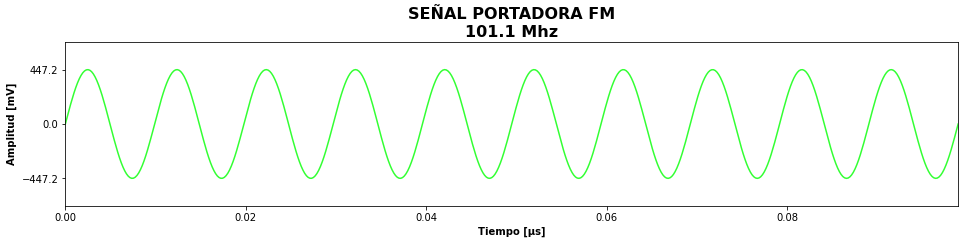

In [4]:
# [iPython] - Gráficas - Caracterización de una señal de FM
# ---------------------------------------------------------
# Emisora Universidad de Nariño 101.1 Mhz - FM
fp = 101_100_000        # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Potencia de un transmisor de 10 W y antena de (50 Ω - 10Km)
Potencia = 10
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 10                 # Numero de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estandar
print(f"----------------------------------------------")
print(f" Frecuencia de la portadora:       {fp/1_000_000:7.1f} Mhz")
print(f" Longitud de onda de la portadora: {299_792_458/fp:7.1f} mts")
print(f"----------------------------------------------")

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de FM
# ----------------------------------------------------
pl.figure(figsize=(16,3))
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV 
pl.plot(t, Sp, color="#33FF33")
# Limites y garrapatas
pl.xlim(t.min(), t.max())
pl.ylim(Sp.min()*1.5, Sp.max()*1.5)
pl.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
pl.title("Señal portadora FM\n".upper() + 
         f"{fp/1_000_000:.1f} Mhz", fontsize=16, fontweight="bold")
pl.xlabel("Tiempo [μs]", fontweight="bold")
pl.ylabel("Amplitud [mV]", fontweight="bold")
pl.show()

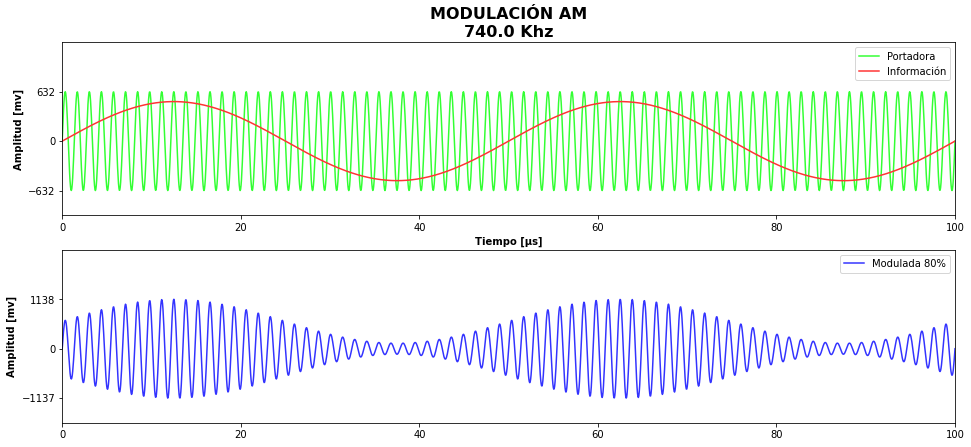

In [5]:
# [iPython] - Múltiples Gráficas - Modulacion AM
# ---------------------------------------------
# Prametros señal 1 - señal de la portadora 
# --------------------------------
# Ecos de pasto 740 Khz - AM - Onda media
fp = 740_000            # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Potencia de un transmisor de 20 W y antena de (50 Ω - 10Km)
Potencia = 20
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
# Parametros señal 2 - señal de informacion de audio
# ---------------------------------------
fi = 20_000             # Frecuencia de una señal de audio
Wi = 2 * pi * fi        # Frecuencia angular de la portadora
h = 80                  # Porcentaje de modulacion (índice)
Ai = Ap * (h/100)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 2                  # Numero de longitudes de onda visibles
t  = np.linspace(0, nλ/fi, 2048, endpoint=True)

# Señal portadora de FM
Sp = Ap * sin(Wp*t)
# Señal información
θ = 0
Si = Ai * sin(Wi*t + θ)
# Señal modulada en FM
Sm = (Si/Ap + 1) * Sp

# Gráficas
# Eje 1 - Señal portadora de FM y señal de información
# ----------------------------------------------------
pl.figure(figsize=(16, 7))
t *= 1_000_000      # Transformando a μs
Sp *= 1_000         # Transformando a mV 
Si *= 1_000         # Transformando a mV
Sm *= 1_000         # Transformando a mV 
pl.subplot(211)
pl.plot(t, Sp, label="Portadora", color="#33FF33")
pl.plot(t, Si, label="Información", color="#FF3333")

pl.xlim(t.min(), t.max())
pl.ylim(Sp.min()*1.5, Sp.max()*2)
pl.yticks([Sp.min(), 0, Sp.max()])
# Textos
pl.title("Modulación AM\n".upper()+ 
         f"{fp/1_000:.1f} Khz", fontsize=16, fontweight="bold")
pl.xlabel("Tiempo [μs]", fontweight="bold")
pl.ylabel("Amplitud [mv]", fontweight="bold")
pl.legend()

# Eje 2 - Señal modulada en FM
# ----------------------------
pl.subplot(212)
pl.plot(t, Sm, label=f"Modulada {h}%", color="#3333FF")

pl.xlim(t.min(), t.max())
pl.ylim(Sm.min()*1.5, Sm.max()*2)
pl.yticks([Sm.min(), 0, Sm.max()])

pl.ylabel("Amplitud [mv]", fontweight="bold")
pl.legend()

pl.show()

In [9]:
Kp = 6.79e-34           # Constante de Plank [J.s]
Vc = 299_792_458        # Velocidad de la luz [m.s]
λp = Vc / fp            # Longitud de onda de la portadora [m]
Ep = Kp * fp            # Energia [J]
Pp = 3600 * Ep

# Diccionario de frecuencias de la luz en Thz
frecuencias = {"Infrarojo":337, "Rojo":470, "Amarillo":496, "Verde":581, "Azul": 641, "Violeta":744}

# Salida estandar - Formateo de cadenas
print(f"-----------------------------------------------------------------------")
print(f"|   Frecuencia de la portadora:        | {fp:19.2e} Hz       |")
print(f"|   Longitud de onda de la portadora:  | {λp:19.2e} Mts      |")
print(f"|   Energia de la portadora:           | {Ep:19.2e} Julios   |")
print(f"|   Potencia de la portadora (1h):     | {Pp:19.2e} Vatios   |")
print(f"-----------------------------------------------------------------------")
print(f"| Color de la Luz | FRECUENCIA | LONGITUD ONDA |  ENERGIA  | POTENCIA |")
print(f"-----------------------------------------------------------------------")
for key in frecuencias:
    color = key
    f = frecuencias[key] * 1e12
    λ = Vc / f
    e = Kp * f
    p = 3600 * e
    print(f"|       {color:>9} | {f:10.2e} |  {λ:11.2e}  |  {e:7.2e} | {p:7.2e} |")

print(f"-----------------------------------------------------------------------")

-----------------------------------------------------------------------
|   Frecuencia de la portadora:        |            7.40e+05 Hz       |
|   Longitud de onda de la portadora:  |            4.05e+02 Mts      |
|   Energia de la portadora:           |            5.02e-28 Julios   |
|   Potencia de la portadora (1h):     |            1.81e-24 Vatios   |
-----------------------------------------------------------------------
| Color de la Luz | FRECUENCIA | LONGITUD ONDA |  ENERGIA  | POTENCIA |
-----------------------------------------------------------------------
|       Infrarojo |   3.37e+14 |     8.90e-07  |  2.29e-19 | 8.24e-16 |
|            Rojo |   4.70e+14 |     6.38e-07  |  3.19e-19 | 1.15e-15 |
|        Amarillo |   4.96e+14 |     6.04e-07  |  3.37e-19 | 1.21e-15 |
|           Verde |   5.81e+14 |     5.16e-07  |  3.94e-19 | 1.42e-15 |
|            Azul |   6.41e+14 |     4.68e-07  |  4.35e-19 | 1.57e-15 |
|         Violeta |   7.44e+14 |     4.03e-07  |  5.05e-19 | 1.8

---
## Mas Recursos

- [Documentación oficial de Jupyter](https://jupyter.org/documentation)
- [Documentación de Jupyter VSCode](https://code.visualstudio.com/docs/python/jupyter-support)
